In [1]:
!pip install kaggle

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:06<00:00, 221MB/s]
100% 812M/812M [00:06<00:00, 123MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting the compressed zipfile

from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extraction done.')

Extraction done.


In [6]:
#extracting the compressed zipfile

from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extraction done.')

Extraction done.


In [7]:
import os
#counting the number of file in train folder

path,dirs,files= next(os.walk('/content/train'))

file_count=len(files)
print('no of files: ',file_count)

no of files:  25000


Printing the names of images

In [27]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.2128.jpg', 'cat.12288.jpg', 'cat.5362.jpg', 'cat.9130.jpg', 'cat.11353.jpg', 'cat.8761.jpg', 'dog.6001.jpg', 'cat.5481.jpg', 'dog.9623.jpg', 'cat.4211.jpg', 'cat.786.jpg', 'dog.4214.jpg', 'cat.3369.jpg', 'dog.9617.jpg', 'cat.4385.jpg', 'cat.5340.jpg', 'cat.12079.jpg', 'cat.7020.jpg', 'dog.10228.jpg', 'cat.12111.jpg', 'cat.7327.jpg', 'cat.10713.jpg', 'cat.3763.jpg', 'dog.3121.jpg', 'dog.8706.jpg', 'cat.6366.jpg', 'dog.11049.jpg', 'dog.7577.jpg', 'cat.8872.jpg', 'cat.1572.jpg', 'cat.8270.jpg', 'dog.9773.jpg', 'cat.6975.jpg', 'cat.6024.jpg', 'cat.5485.jpg', 'dog.9801.jpg', 'cat.1481.jpg', 'dog.5742.jpg', 'dog.2973.jpg', 'dog.11791.jpg', 'dog.3122.jpg', 'cat.12136.jpg', 'dog.2838.jpg', 'dog.10211.jpg', 'cat.7142.jpg', 'cat.318.jpg', 'dog.3340.jpg', 'cat.12183.jpg', 'dog.9404.jpg', 'cat.4052.jpg', 'dog.1088.jpg', 'dog.7404.jpg', 'cat.2952.jpg', 'cat.12182.jpg', 'dog.1127.jpg', 'cat.6267.jpg', 'dog.10093.jpg', 'cat.8915.jpg', 'dog.683.jpg', 'dog.5571.jpg', 'dog.6617.jpg', 'cat.2460.jpg

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [14]:
#Displaying dog images
img= mpimg.imread('/content/train/dog.6001.jpg')

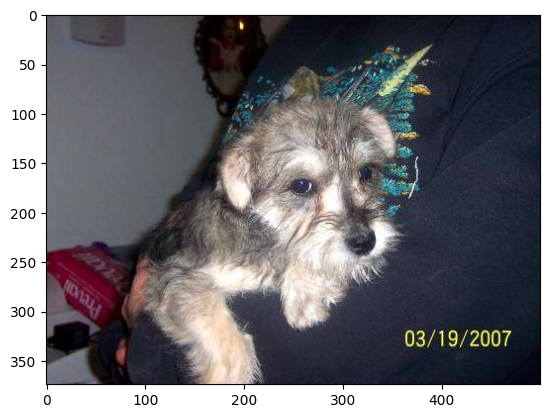

In [17]:
imgplt= plt.imshow(img)
plt.show()

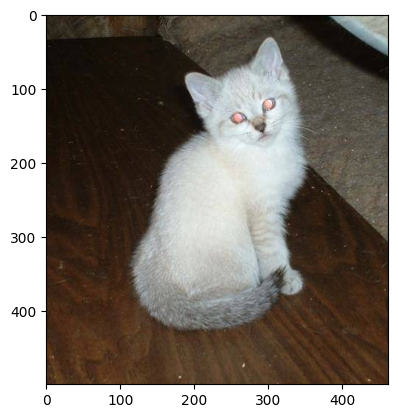

In [18]:
#displaying cat img

imgcat=mpimg.imread('/content/train/cat.11353.jpg')
imgplt=plt.imshow(imgcat)
plt.show()

Resizing the images to 224x224 pixels

In [33]:
countcat,countdog=0,0
file_names=os.listdir('/content/train')
for names in file_names:
  if names[0:3]=='cat':
    countcat+=1
  else:
    countdog+=1
print(f'cat={countcat}, dog={countdog}')

cat=12500, dog=12500


In [34]:
#creating a directory for resized images
os.mkdir('/content/resized_imgs')

In [40]:
org_folder= '/content/train/'
resized_img_folder= '/content/resized_imgs/'


for i in range(2000):
  filename=os.listdir(org_folder)[i]
  path=org_folder+filename

  img = Image.open(path)
  img = img.resize((224,224))
  img =img.convert('RGB')
  newpath=resized_img_folder+filename
  img.save(newpath)

In [ ]:
for filename in os.listdir('/content/resized_imgs'):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(resized_img_folder, filename)
            img = Image.open(img_path)
            width, height = img.size
            print(f'Image: {filename} - Size: {width}x{height} pixels')

In [43]:
countcat,countdog=0,0
file_names=os.listdir('/content/resized_imgs')
for names in file_names:
  if names[0:3]=='cat':
    countcat+=1
  else:
    countdog+=1
print(f'cat={countcat}, dog={countdog}')

cat=986, dog=1014


Creating lables for dogs and cats as 0 and 1

In [47]:
labels=[]
file_names=os.listdir('/content/resized_imgs')

for i in range(2000):
  filename=file_names[i]
  if filename[:3]=='cat':
    labels.append(1)
  else:
    labels.append(0)


In [50]:
print(file_names[:10])
print(labels[:10])

['cat.2128.jpg', 'cat.12288.jpg', 'cat.5362.jpg', 'cat.9130.jpg', 'cat.11353.jpg', 'cat.8761.jpg', 'dog.6001.jpg', 'cat.5481.jpg', 'dog.9623.jpg', 'cat.4211.jpg']
[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


COnverting resized images to numpy array

In [51]:
import cv2
import glob

In [55]:
img_dir= '/content/resized_imgs/'
img_extension= ['png','jpg']
files=[]

[files.extend(glob.glob(img_dir + '*.' + e)) for e in img_extension] # creates a list of  path of each image
dog_cat_images= np.asarray([cv2.imread(file) for file in files])

In [57]:
print(dog_cat_images[0])

[[[ 82 127 140]
  [ 83 128 141]
  [ 84 129 142]
  ...
  [ 91 139 151]
  [ 90 138 150]
  [ 87 135 147]]

 [[ 83 128 141]
  [ 83 128 141]
  [ 84 129 142]
  ...
  [ 90 138 150]
  [ 89 137 149]
  [ 87 135 147]]

 [[ 84 129 142]
  [ 84 129 142]
  [ 84 129 142]
  ...
  [ 88 136 148]
  [ 88 136 148]
  [ 86 134 146]]

 ...

 [[107 133 140]
  [108 134 141]
  [110 136 143]
  ...
  [108 127 142]
  [103 119 136]
  [ 97 115 132]]

 [[107 132 142]
  [108 133 143]
  [110 135 145]
  ...
  [125 142 155]
  [130 145 161]
  [130 146 162]]

 [[108 133 143]
  [109 134 144]
  [112 137 147]
  ...
  [ 98 114 127]
  [106 121 137]
  [111 126 142]]]


train test split

In [59]:
X= dog_cat_images
Y= np.asarray(labels)

In [60]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)


In [61]:
print(X_train.shape,X_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3)


In [62]:
#scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [63]:
X_train_scaled

array([[[[0.44705882, 0.43921569, 0.69803922],
         [0.5372549 , 0.53333333, 0.77647059],
         [0.64705882, 0.63529412, 0.85098039],
         ...,
         [0.94117647, 0.88627451, 0.92941176],
         [0.95294118, 0.89019608, 0.93333333],
         [0.95686275, 0.89411765, 0.9372549 ]],

        [[0.48235294, 0.4745098 , 0.73333333],
         [0.54117647, 0.5372549 , 0.78039216],
         [0.63921569, 0.62745098, 0.84313725],
         ...,
         [0.94117647, 0.88627451, 0.92941176],
         [0.95294118, 0.89019608, 0.93333333],
         [0.95686275, 0.89411765, 0.9372549 ]],

        [[0.49803922, 0.49411765, 0.74509804],
         [0.52156863, 0.52156863, 0.75686275],
         [0.61960784, 0.61176471, 0.81568627],
         ...,
         [0.94117647, 0.89019608, 0.92156863],
         [0.95294118, 0.89019608, 0.93333333],
         [0.95686275, 0.89411765, 0.9372549 ]],

        ...,

        [[0.5372549 , 0.56470588, 0.54509804],
         [0.50588235, 0.53333333, 0.51372549]

Building the neural Network


In [64]:
import tensorflow as tf
import tensorflow_hub as hub

In [65]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [66]:
num_of_classes= 2

model= tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [67]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [68]:
model.fit(X_train_scaled,Y_train,epochs=20)

Epoch 1/20
50/50 [==============================] - 75s 1s/step - loss: 0.1705 - acc: 0.9388
Epoch 2/20
50/50 [==============================] - 74s 1s/step - loss: 0.0756 - acc: 0.9731
Epoch 3/20
50/50 [==============================] - 68s 1s/step - loss: 0.0554 - acc: 0.9844
Epoch 4/20
50/50 [==============================] - 67s 1s/step - loss: 0.0442 - acc: 0.9887
Epoch 5/20
50/50 [==============================] - 70s 1s/step - loss: 0.0355 - acc: 0.9931
Epoch 6/20
50/50 [==============================] - 72s 1s/step - loss: 0.0293 - acc: 0.9962
Epoch 7/20
50/50 [==============================] - 67s 1s/step - loss: 0.0239 - acc: 0.9975
Epoch 8/20
50/50 [==============================] - 73s 1s/step - loss: 0.0206 - acc: 0.9981
Epoch 9/20
50/50 [==============================] - 77s 2s/step - loss: 0.0177 - acc: 0.9981
Epoch 10/20
50/50 [==============================] - 68s 1s/step - loss: 0.0150 - acc: 0.9981
Epoch 11/20
50/50 [==============================] - 77s 2s/step - lo

In [69]:
score, acc= model.evaluate(X_test_scaled,Y_test)

13/13 [==============================] - 26s 2s/step - loss: 0.0448 - acc: 0.9850


In [70]:
print('Test Loss =', score)
print('Test Accuracy =', acc)

Test Loss = 0.04480705410242081
Test Accuracy = 0.9850000143051147


Path of the image to be predicted: /content/cat.jpg


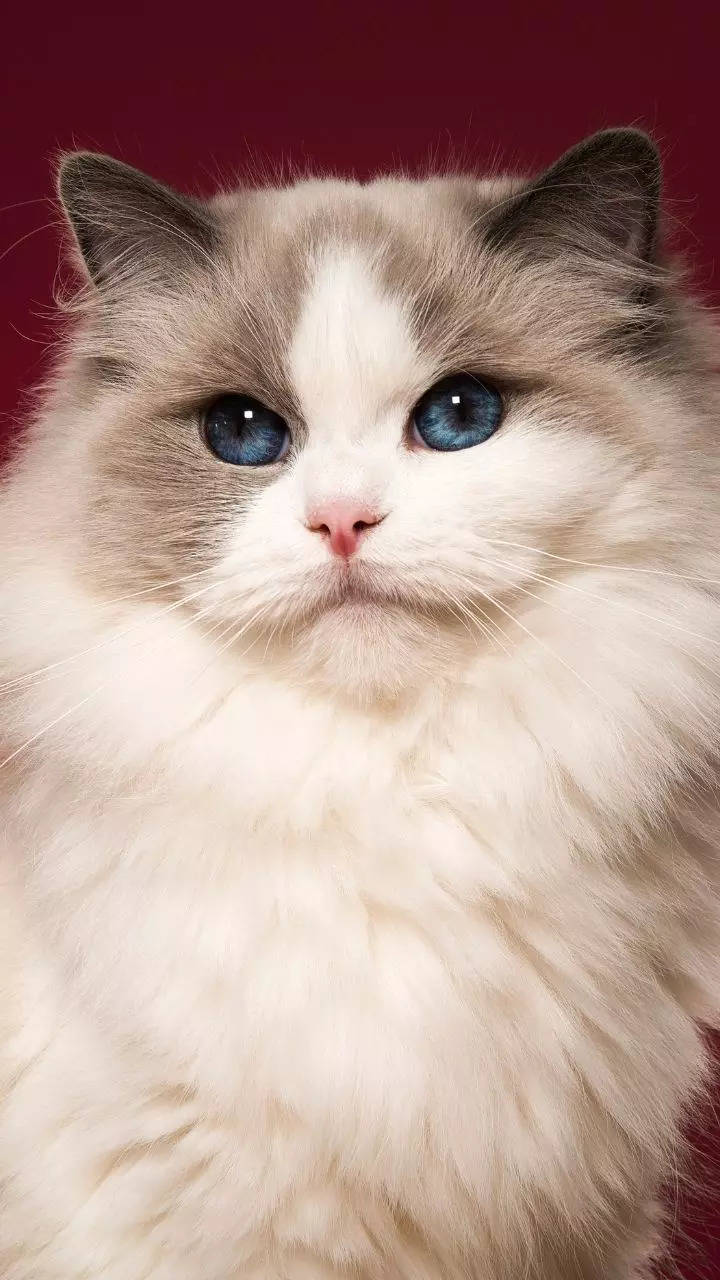

1/1 [==============================] - 0s 79ms/step
[[-6.7437754  7.774204 ]]
1
The image represents a Cat


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


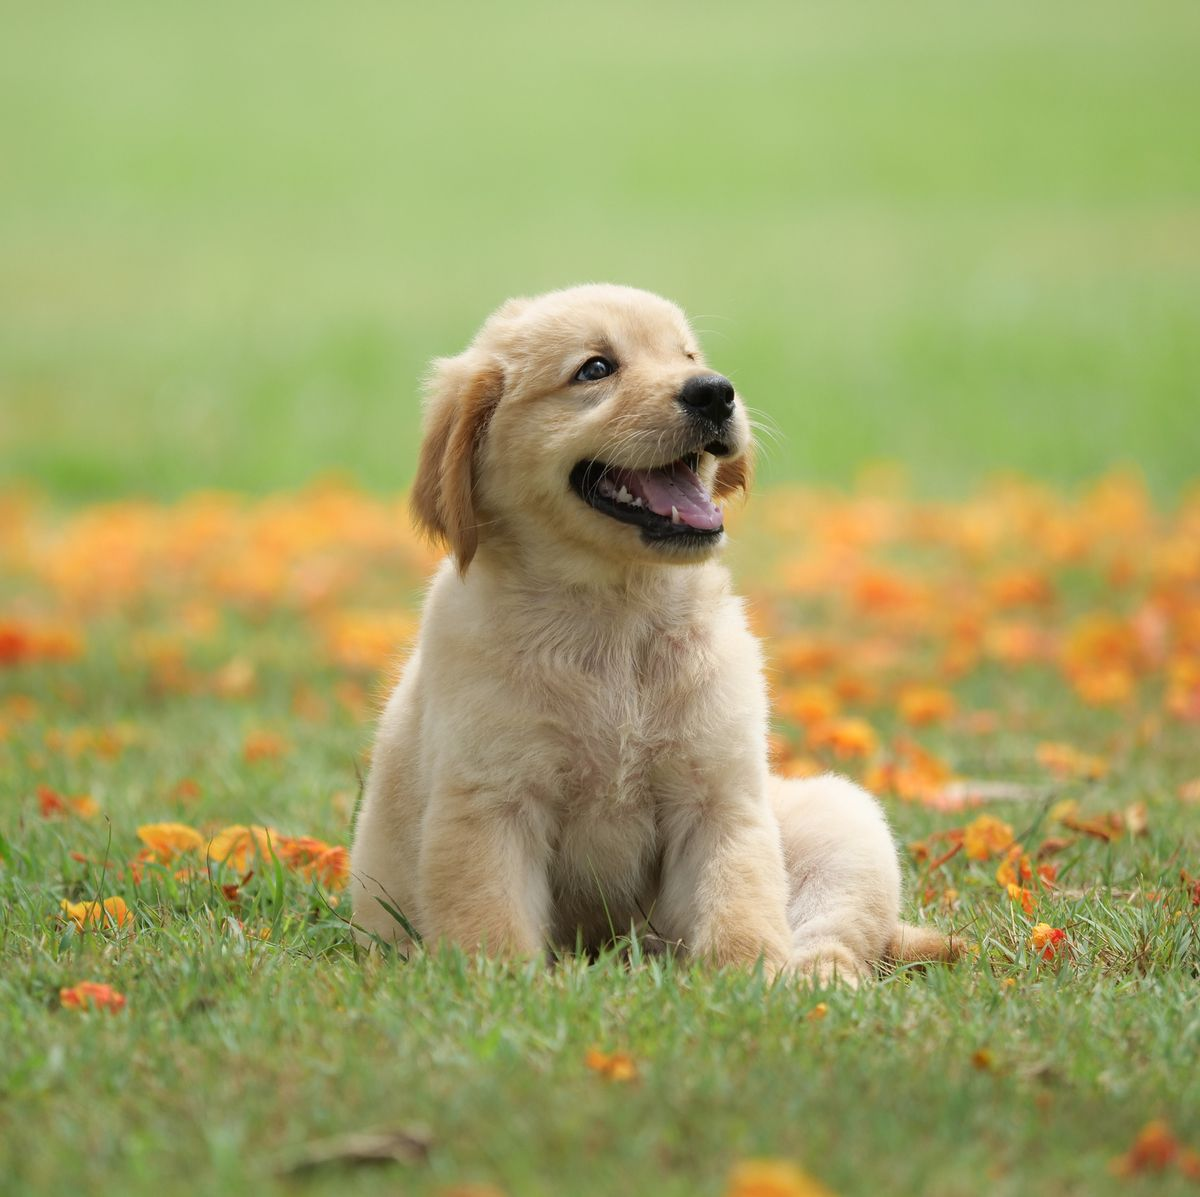

1/1 [==============================] - 0s 78ms/step
[[ 5.1018496 -7.023671 ]]
0
The image represents a Dog


In [74]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')